# Police Fatalities Analysis

## Introduction

This notebook analyzes data on fatal police shootings in the US compiled by The Washington Post since January 1, 2015. The analysis includes socioeconomic factors like poverty rates, education, and demographics.

## Import Statements

In [7]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## Notebook Presentation

In [8]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [9]:
# Load all datasets
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding='windows-1252')
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding='windows-1252')
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding='windows-1252')
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding='windows-1252')
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding='windows-1252')

# Convert numeric columns
df_hh_income['Median Income'] = pd.to_numeric(df_hh_income['Median Income'], errors='coerce')
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'], errors='coerce')
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'], errors='coerce')
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'], errors='coerce')
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'], errors='coerce')
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'], errors='coerce')

# Preliminary Data Exploration

In [10]:
# Examine each dataset
print('Household Income Dataset:')
print(f'Shape: {df_hh_income.shape}')
print(f'Columns: {list(df_hh_income.columns)}')
print(df_hh_income.head())
print('\n' + '='*80 + '\n')

Household Income Dataset:
Shape: (29322, 3)
Columns: ['Geographic Area', 'City', 'Median Income']
  Geographic Area             City  Median Income
0              AL       Abanda CDP      11,207.00
1              AL   Abbeville city      25,615.00
2              AL  Adamsville city      42,575.00
3              AL     Addison town      37,083.00
4              AL       Akron town      21,667.00




In [11]:
print('Poverty Dataset:')
print(f'Shape: {df_pct_poverty.shape}')
print(df_pct_poverty.head())
print(f'\nData types:\n{df_pct_poverty.dtypes}')

Poverty Dataset:
Shape: (29329, 3)
  Geographic Area             City  poverty_rate
0              AL       Abanda CDP         78.80
1              AL   Abbeville city         29.10
2              AL  Adamsville city         25.50
3              AL     Addison town         30.70
4              AL       Akron town         42.00

Data types:
Geographic Area     object
City                object
poverty_rate       float64
dtype: object


In [12]:
print('Fatalities Dataset:')
print(f'Shape: {df_fatalities.shape}')
print(df_fatalities.head())
print(f'\nColumns: {list(df_fatalities.columns)}')
print(f'\nData info:')
print(df_fatalities.info())

Fatalities Dataset:
Shape: (2535, 14)
   id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        Fa

## Data Cleaning - Check for Missing Values and Duplicates

In [13]:
# Check for missing values
print('Missing values per dataset:')
print(f'Household Income: {df_hh_income.isnull().sum().sum()}')
print(f'Poverty: {df_pct_poverty.isnull().sum().sum()}')
print(f'High School: {df_pct_completed_hs.isnull().sum().sum()}')
print(f'Race by City: {df_share_race_city.isnull().sum().sum()}')
print(f'Fatalities: {df_fatalities.isnull().sum().sum()}')

Missing values per dataset:
Household Income: 1937
Poverty: 201
High School: 197
Race by City: 100
Fatalities: 346


In [14]:
# Fill NaN values with 0 for census data
df_hh_income.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)

# Check for duplicates
print('\nDuplicates per dataset:')
print(f'Household Income: {df_hh_income.duplicated().sum()}')
print(f'Poverty: {df_pct_poverty.duplicated().sum()}')
print(f'High School: {df_pct_completed_hs.duplicated().sum()}')
print(f'Race by City: {df_share_race_city.duplicated().sum()}')
print(f'Fatalities: {df_fatalities.duplicated().sum()}')


Duplicates per dataset:
Household Income: 0
Poverty: 0
High School: 0
Race by City: 0
Fatalities: 0


# Chart the Poverty Rate in each US State

In [15]:
# Aggregate poverty rate by state
poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)

print(f'State with highest poverty rate: {poverty_by_state.index[0]} ({poverty_by_state.iloc[0]:.2f}%)')
print(f'State with lowest poverty rate: {poverty_by_state.index[-1]} ({poverty_by_state.iloc[-1]:.2f}%)')

State with highest poverty rate: MS (26.88%)
State with lowest poverty rate: NJ (8.16%)


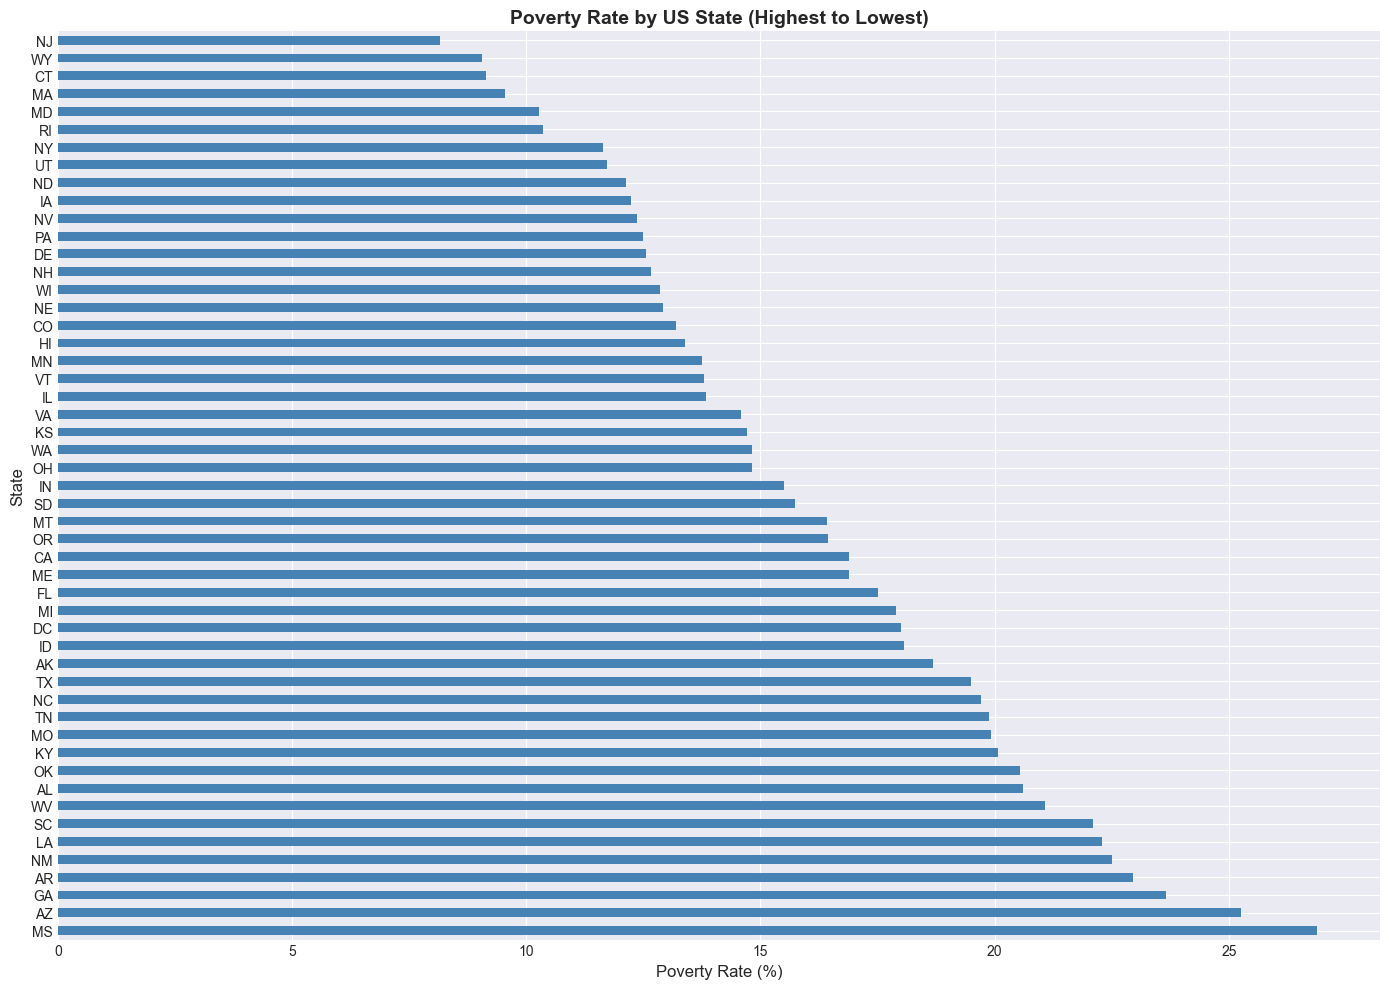

In [16]:
# Create bar chart
plt.figure(figsize=(14, 10))
poverty_by_state.plot(kind='barh', color='steelblue')
plt.xlabel('Poverty Rate (%)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Poverty Rate by US State (Highest to Lowest)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Chart the High School Graduation Rate by US State

State with lowest HS graduation rate: TX (74.09%)
State with highest HS graduation rate: MA (92.03%)


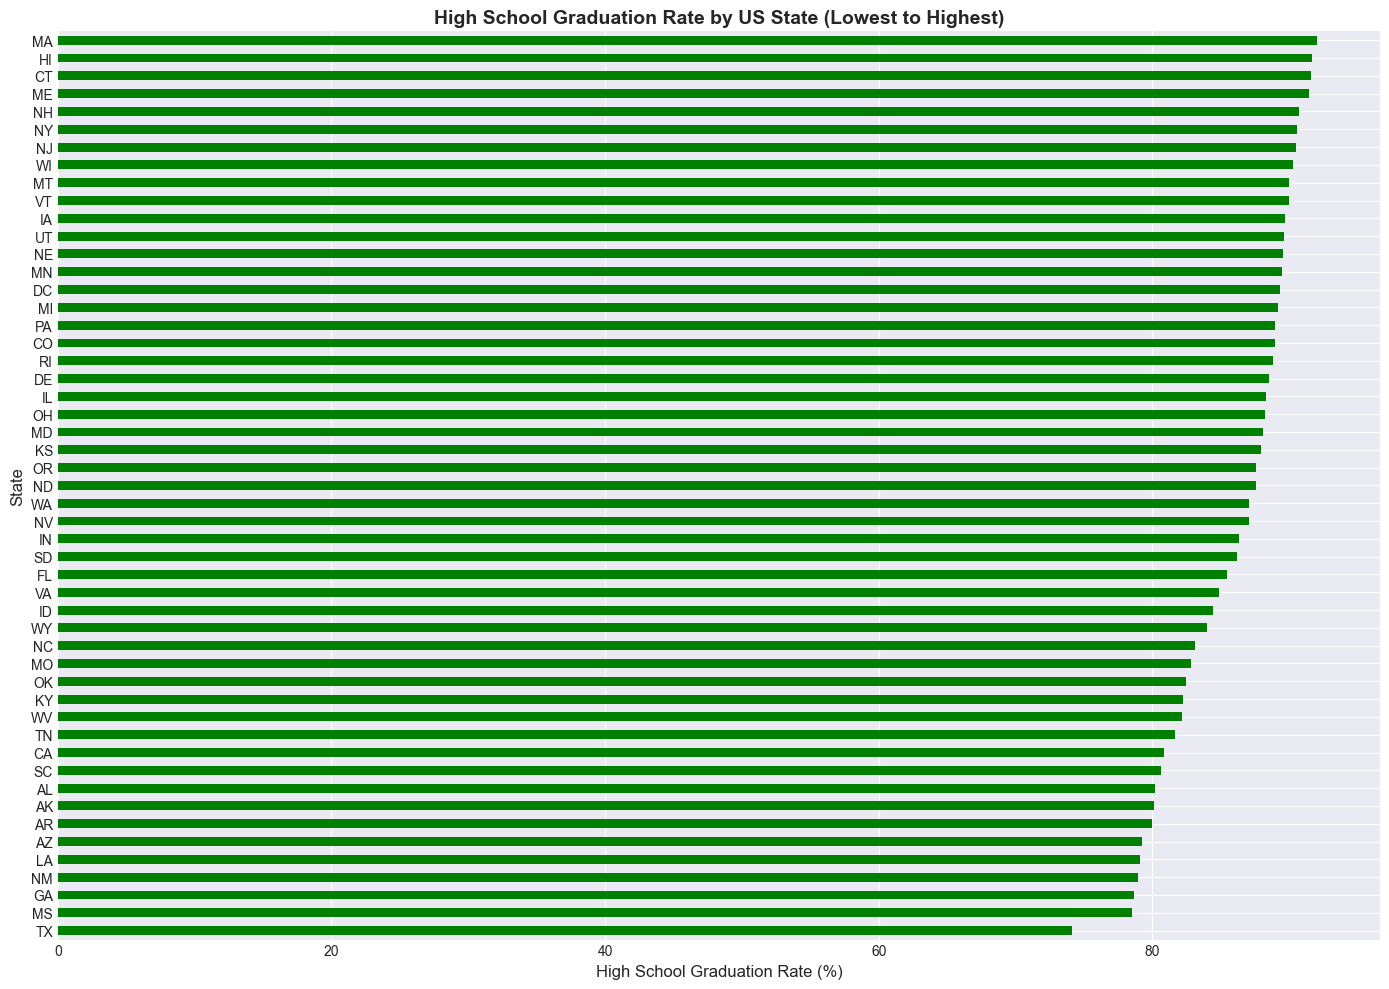

In [17]:
# Aggregate HS graduation rate by state
hs_grad_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values()

print(f'State with lowest HS graduation rate: {hs_grad_by_state.index[0]} ({hs_grad_by_state.iloc[0]:.2f}%)')
print(f'State with highest HS graduation rate: {hs_grad_by_state.index[-1]} ({hs_grad_by_state.iloc[-1]:.2f}%)')

# Create bar chart
plt.figure(figsize=(14, 10))
hs_grad_by_state.plot(kind='barh', color='green')
plt.xlabel('High School Graduation Rate (%)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('High School Graduation Rate by US State (Lowest to Highest)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

## Dual-Axis Line Chart

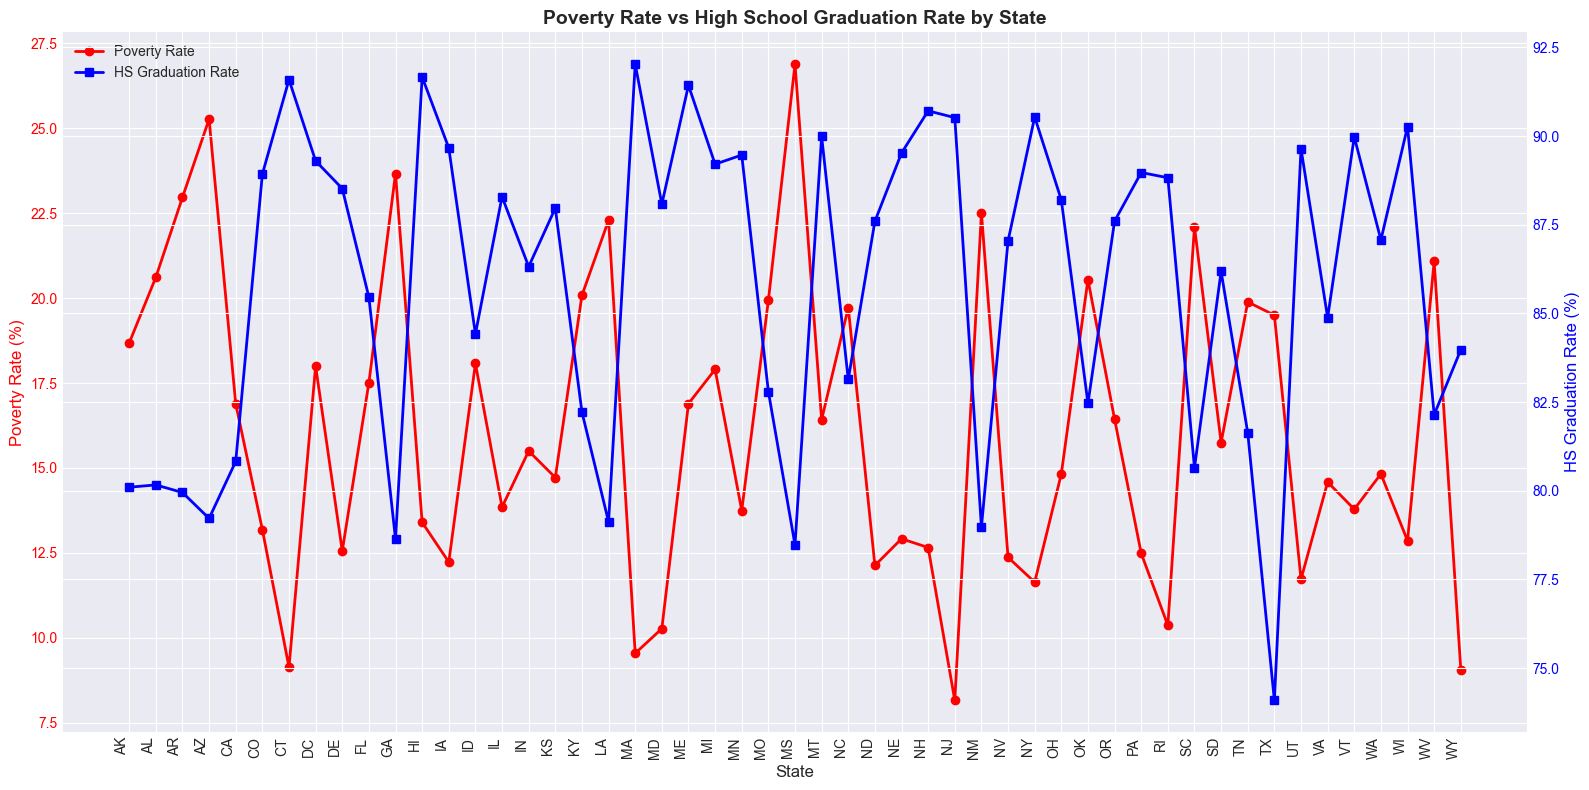

In [18]:
# Prepare data
poverty_agg = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_index()
hs_grad_agg = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_index()

# Create dual-axis line chart
fig, ax1 = plt.subplots(figsize=(16, 8))

ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Poverty Rate (%)', color='red', fontsize=12)
line1 = ax1.plot(poverty_agg.index, poverty_agg.values, color='red', marker='o', label='Poverty Rate', linewidth=2)
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xticklabels(poverty_agg.index, rotation=90, ha='right')

ax2 = ax1.twinx()
ax2.set_ylabel('HS Graduation Rate (%)', color='blue', fontsize=12)
line2 = ax2.plot(hs_grad_agg.index, hs_grad_agg.values, color='blue', marker='s', label='HS Graduation Rate', linewidth=2)
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Poverty Rate vs High School Graduation Rate by State', fontsize=14, fontweight='bold')
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')
plt.tight_layout()
plt.show()

## Seaborn Joint Plot with KDE

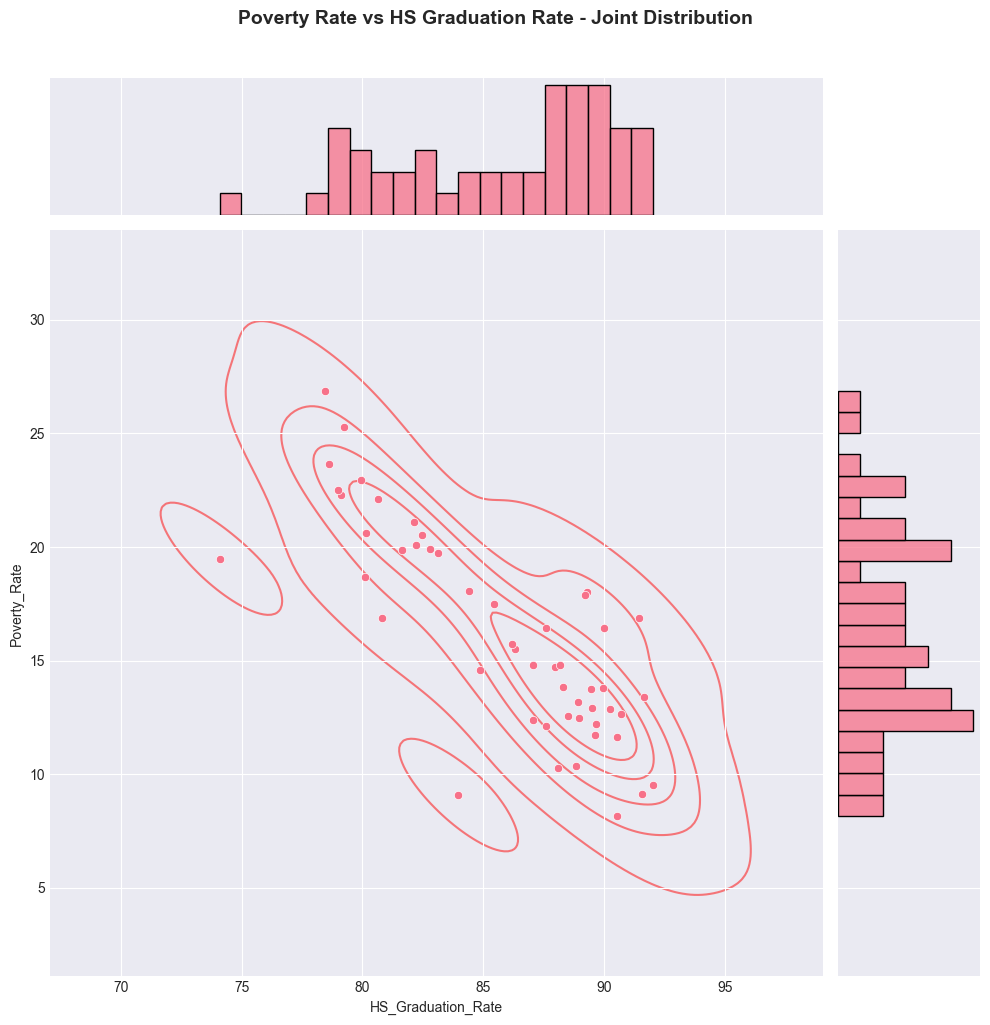

In [19]:
# Create combined dataframe
corr_data = pd.DataFrame({
    'Poverty_Rate': poverty_agg,
    'HS_Graduation_Rate': hs_grad_agg
})

# Jointplot with KDE
g = sns.jointplot(data=corr_data, x='HS_Graduation_Rate', y='Poverty_Rate', 
                  kind='scatter', height=10, marginal_kws=dict(bins=20, fill=True))
g.plot_joint(sns.kdeplot, color='red', zorder=0, levels=6, alpha=0.5)
g.fig.suptitle('Poverty Rate vs HS Graduation Rate - Joint Distribution', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Linear Regression Plot

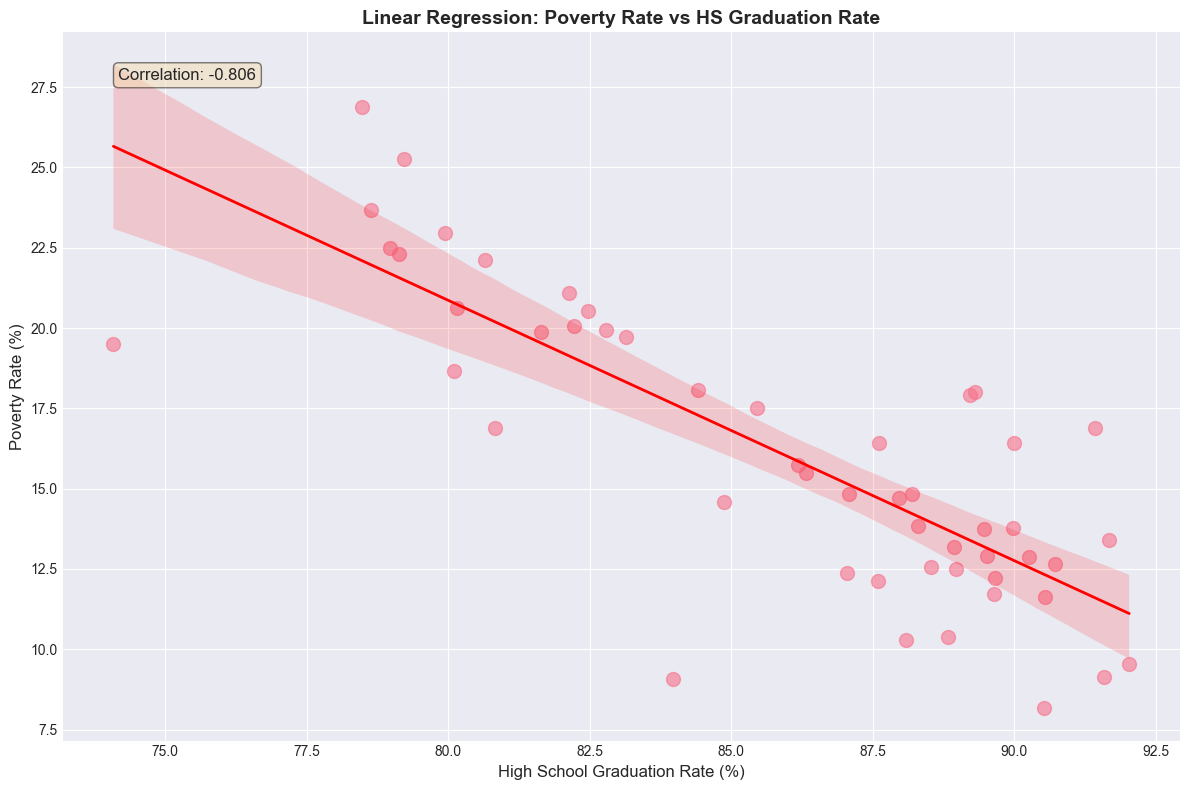

Correlation coefficient: -0.806
The strong negative correlation indicates that states with higher HS graduation rates tend to have lower poverty rates.


In [20]:
plt.figure(figsize=(12, 8))
sns.regplot(data=corr_data, x='HS_Graduation_Rate', y='Poverty_Rate', 
            scatter_kws={'alpha':0.6, 's':100}, line_kws={'color':'red', 'linewidth':2})
plt.xlabel('High School Graduation Rate (%)', fontsize=12)
plt.ylabel('Poverty Rate (%)', fontsize=12)
plt.title('Linear Regression: Poverty Rate vs HS Graduation Rate', fontsize=14, fontweight='bold')

# Calculate correlation
correlation = corr_data['Poverty_Rate'].corr(corr_data['HS_Graduation_Rate'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
plt.show()

print(f'Correlation coefficient: {correlation:.3f}')
print('The strong negative correlation indicates that states with higher HS graduation rates tend to have lower poverty rates.')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

<Figure size 1600x1000 with 0 Axes>

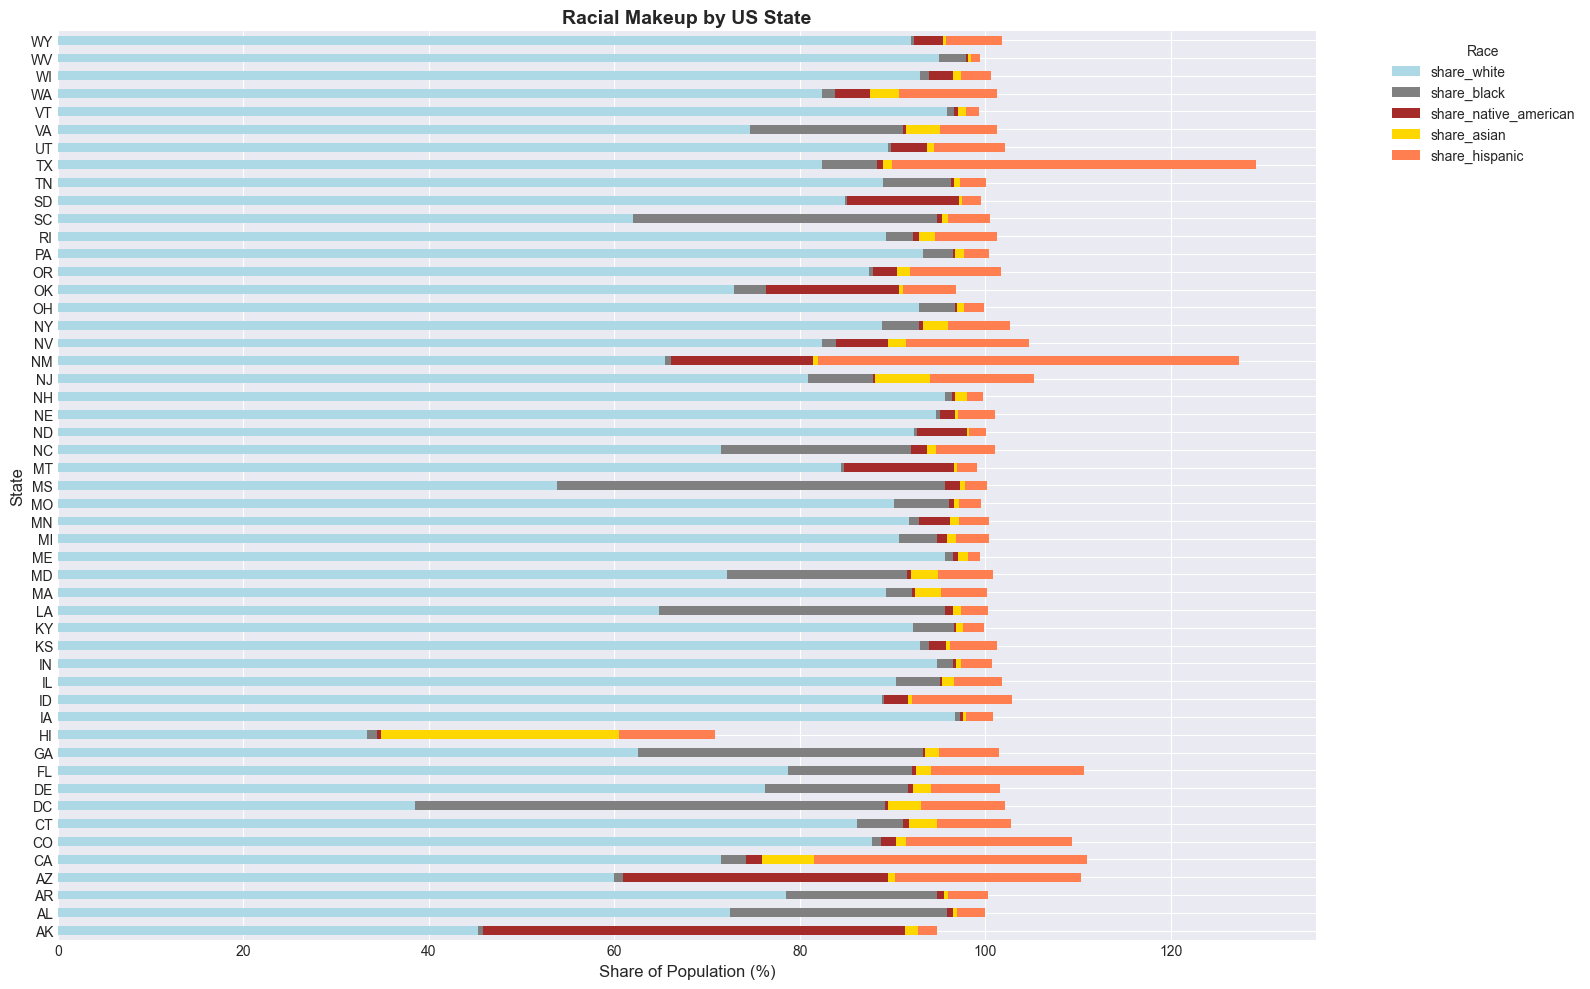

In [21]:
# Aggregate race data by state
race_by_state = df_share_race_city.groupby('Geographic area')[
    ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
].mean()

# Create stacked bar chart
plt.figure(figsize=(16, 10))
race_by_state.plot(kind='barh', stacked=True, figsize=(16, 10), 
                   color=['lightblue', 'gray', 'brown', 'gold', 'coral'])
plt.xlabel('Share of Population (%)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Racial Makeup by US State', fontsize=14, fontweight='bold')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create Donut Chart of People Killed by Race

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: count, dtype: int64


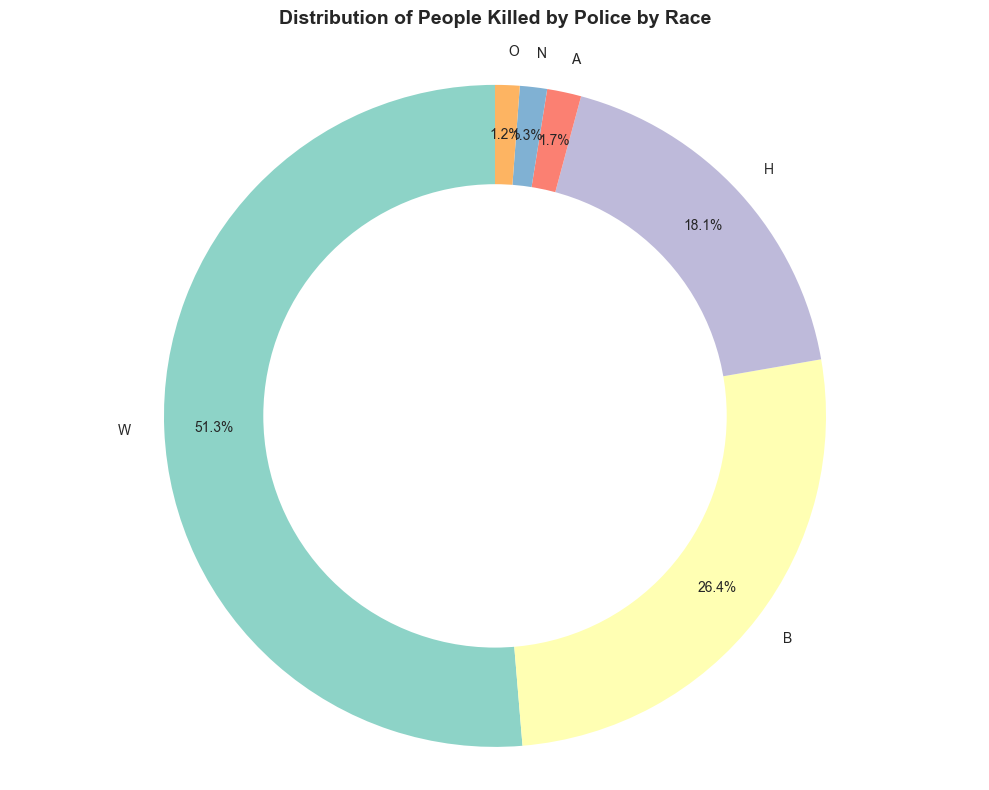

In [22]:
race_counts = df_fatalities['race'].value_counts()
print(race_counts)

# Create donut chart
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.Set3(range(len(race_counts)))
wedges, texts, autotexts = ax.pie(race_counts.values, labels=race_counts.index, autopct='%1.1f%%',
                                    startangle=90, colors=colors, pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('Distribution of People Killed by Police by Race', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Create a Chart Comparing Deaths of Men and Women

gender
M    2428
F     107
Name: count, dtype: int64

Ratio M:F = 22.7:1


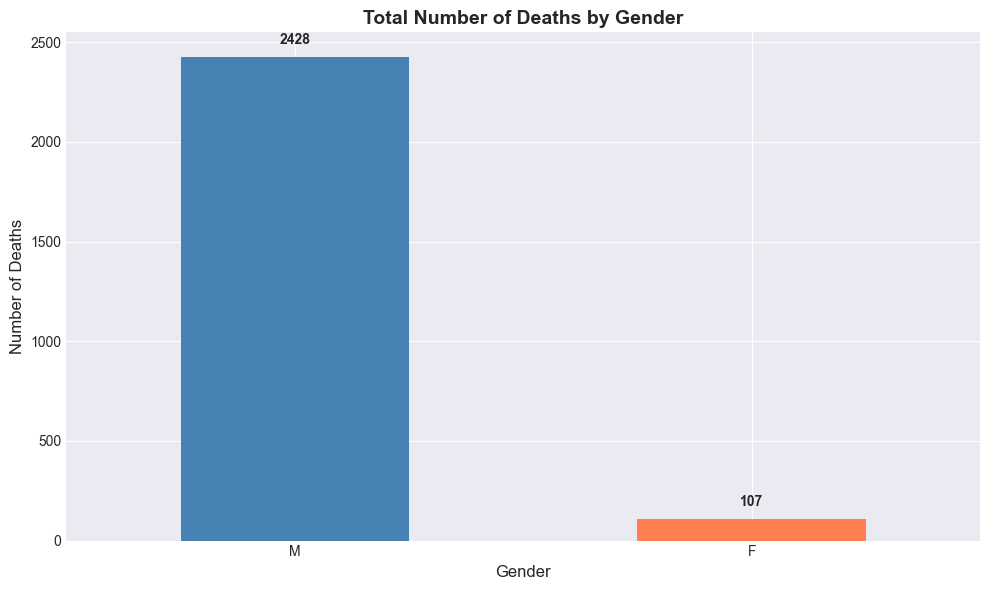

In [23]:
gender_counts = df_fatalities['gender'].value_counts()
print(gender_counts)
print(f'\nRatio M:F = {gender_counts["M"]/gender_counts["F"]:.1f}:1')

plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color=['steelblue', 'coral'])
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.title('Total Number of Deaths by Gender', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
for i, v in enumerate(gender_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

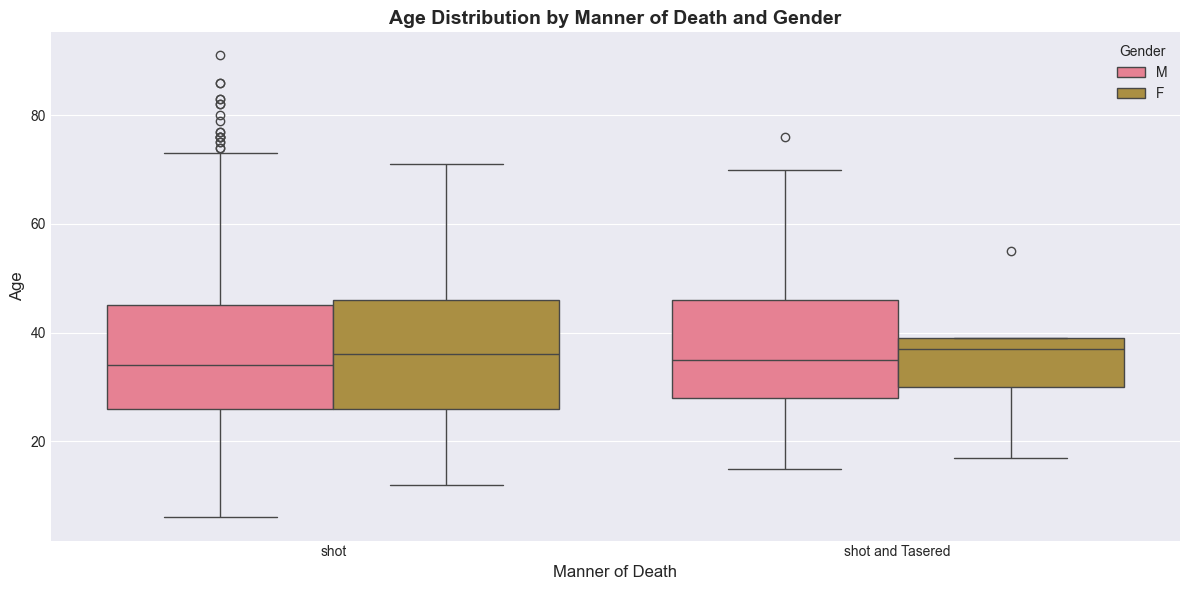

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fatalities, x='manner_of_death', y='age', hue='gender')
plt.xlabel('Manner of Death', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Age Distribution by Manner of Death and Gender', fontsize=14, fontweight='bold')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Were People Armed?

In [25]:
armed_counts = df_fatalities['armed'].value_counts().head(15)
print('Top 15 most common weapon types:')
print(armed_counts)

# Calculate percentages
total = len(df_fatalities)
gun_count = df_fatalities[df_fatalities['armed'] == 'gun'].shape[0]
unarmed_count = df_fatalities[df_fatalities['armed'] == 'unarmed'].shape[0]

print(f'\nTotal people killed: {total}')
print(f'Armed with gun: {gun_count} ({gun_count/total*100:.1f}%)')
print(f'Unarmed: {unarmed_count} ({unarmed_count/total*100:.1f}%)')

Top 15 most common weapon types:
armed
gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
machete             18
unknown weapon      18
ax                   9
Taser                9
baseball bat         8
sword                8
hammer               7
box cutter           7
metal pipe           7
Name: count, dtype: int64

Total people killed: 2535
Armed with gun: 1398 (55.1%)
Unarmed: 171 (6.7%)


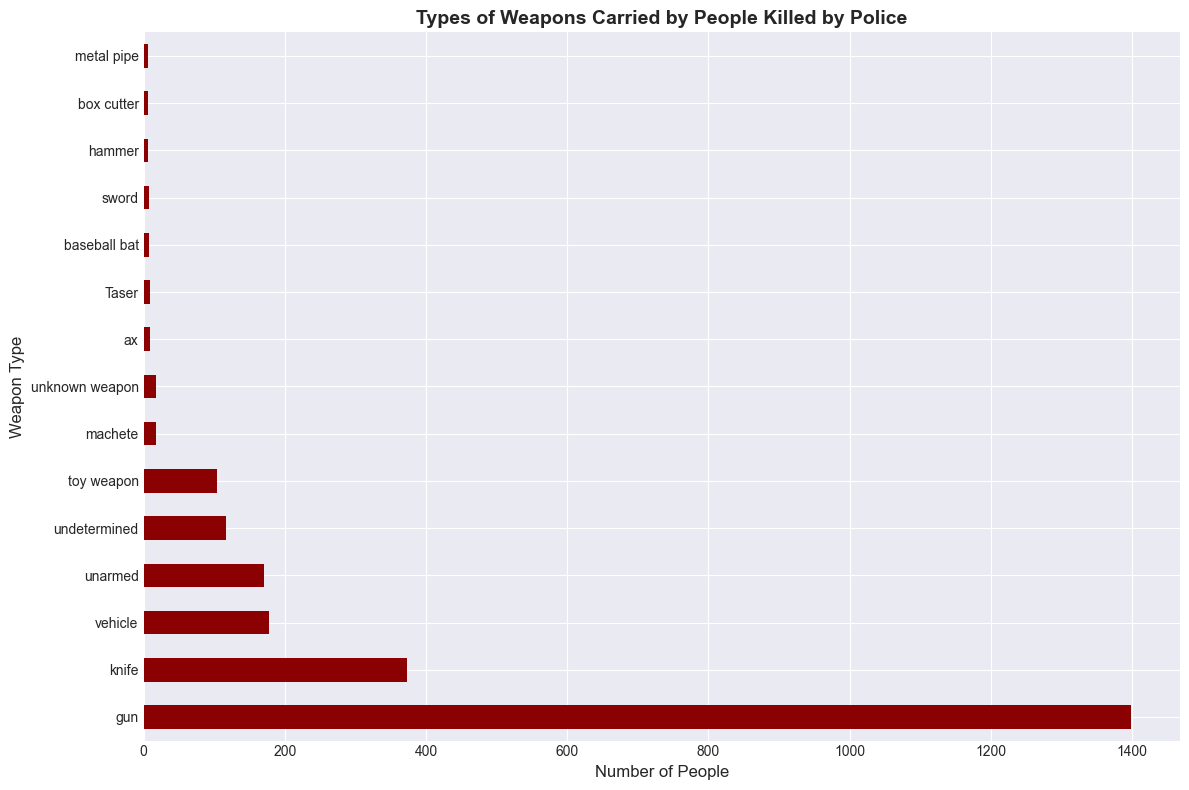

In [26]:
plt.figure(figsize=(12, 8))
armed_counts.plot(kind='barh', color='darkred')
plt.xlabel('Number of People', fontsize=12)
plt.ylabel('Weapon Type', fontsize=12)
plt.title('Types of Weapons Carried by People Killed by Police', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# How Old Were the People Killed?

In [27]:
# Remove NaN ages
ages = df_fatalities['age'].dropna()

# Calculate percentage under 25
under_25 = (ages < 25).sum()
pct_under_25 = under_25 / len(ages) * 100

print(f'Percentage of people killed under 25 years old: {pct_under_25:.2f}%')
print(f'Mean age: {ages.mean():.1f} years')
print(f'Median age: {ages.median():.1f} years')
print(f'Standard deviation: {ages.std():.1f} years')

Percentage of people killed under 25 years old: 18.31%
Mean age: 36.6 years
Median age: 34.0 years
Standard deviation: 13.0 years


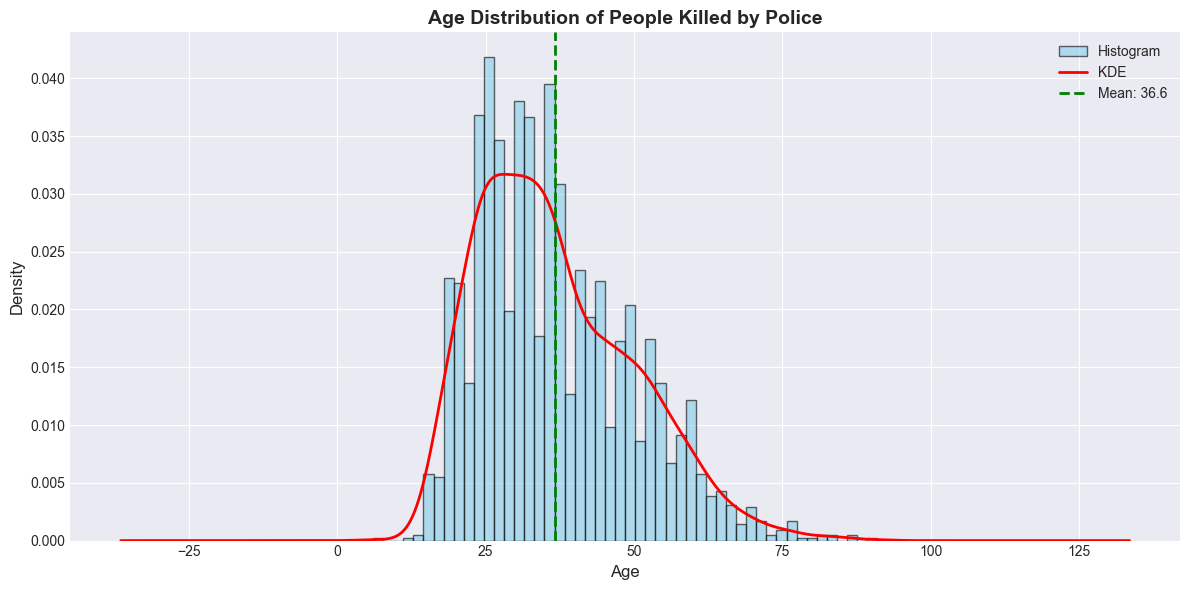

In [28]:
# Histogram and KDE
plt.figure(figsize=(12, 6))
plt.hist(ages, bins=50, alpha=0.6, color='skyblue', edgecolor='black', density=True, label='Histogram')
ages.plot(kind='kde', color='red', linewidth=2, label='KDE')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Age Distribution of People Killed by Police', fontsize=14, fontweight='bold')
plt.axvline(ages.mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {ages.mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()

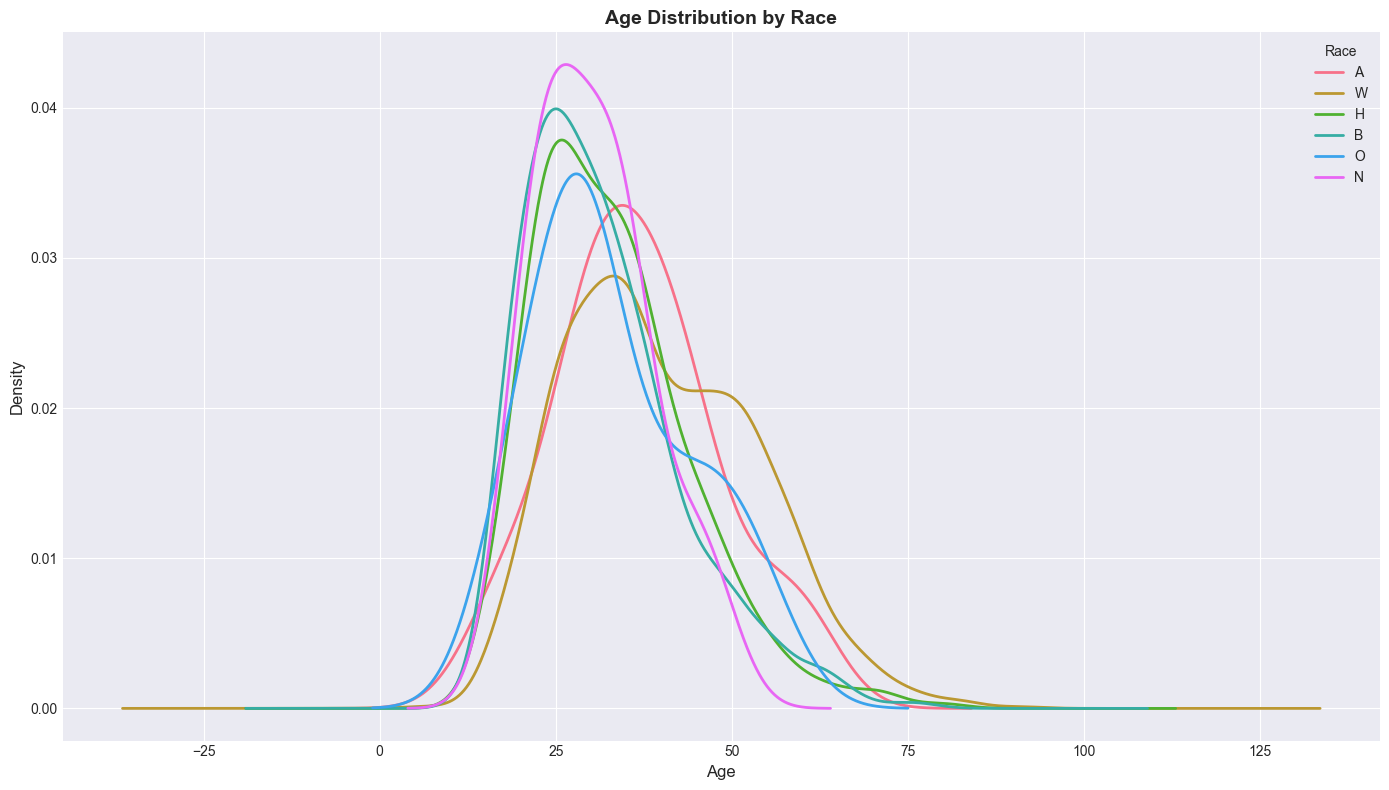

In [29]:
# KDE plot by race
plt.figure(figsize=(14, 8))
for race in df_fatalities['race'].dropna().unique():
    race_ages = df_fatalities[df_fatalities['race'] == race]['age'].dropna()
    if len(race_ages) > 10:
        race_ages.plot(kind='kde', label=race, linewidth=2)
        
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Age Distribution by Race', fontsize=14, fontweight='bold')
plt.legend(title='Race')
plt.tight_layout()
plt.show()

# Race of People Killed

In [30]:
race_totals = df_fatalities['race'].value_counts()
print(race_totals)
print(f'\nPercentages:')
print(race_totals / len(df_fatalities) * 100)

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: count, dtype: int64

Percentages:
race
W   47.38
B   24.38
H   16.69
A    1.54
N    1.22
O    1.10
Name: count, dtype: float64


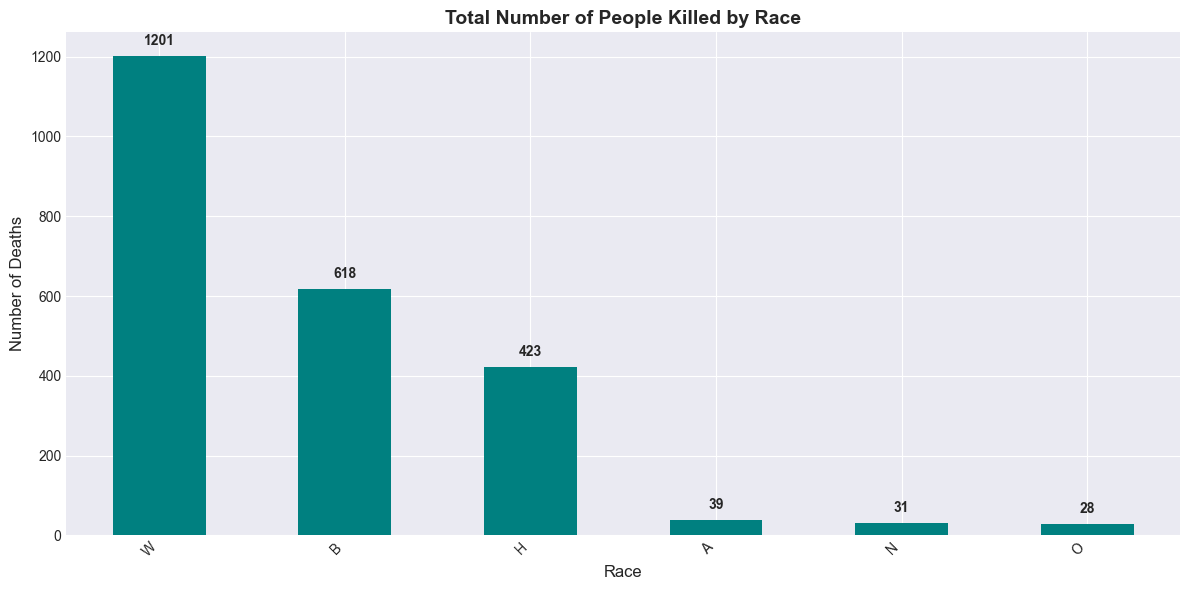

In [31]:
plt.figure(figsize=(12, 6))
race_totals.plot(kind='bar', color='teal')
plt.xlabel('Race', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.title('Total Number of People Killed by Race', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(race_totals.values):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Mental Illness and Police Killings

In [32]:
mental_illness_counts = df_fatalities['signs_of_mental_illness'].value_counts()
print(mental_illness_counts)

pct_mental_illness = mental_illness_counts.get(True, 0) / len(df_fatalities) * 100
print(f'\nPercentage with signs of mental illness: {pct_mental_illness:.2f}%')

signs_of_mental_illness
False    1902
True      633
Name: count, dtype: int64

Percentage with signs of mental illness: 24.97%


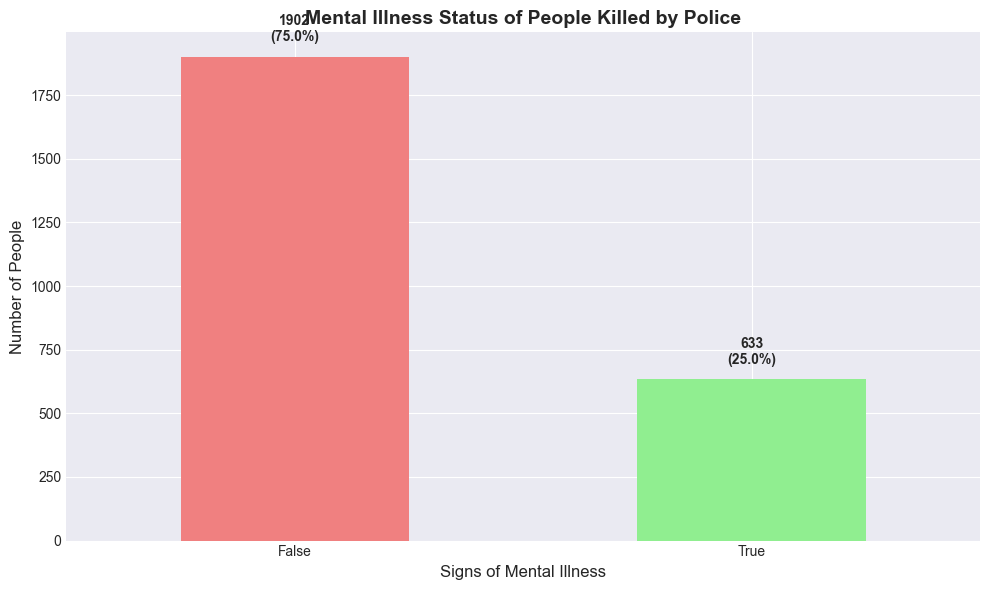

In [33]:
plt.figure(figsize=(10, 6))
mental_illness_counts.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.xlabel('Signs of Mental Illness', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title('Mental Illness Status of People Killed by Police', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
for i, v in enumerate(mental_illness_counts.values):
    plt.text(i, v + 50, f'{v}\n({v/len(df_fatalities)*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

In [34]:
top_10_cities = df_fatalities['city'].value_counts().head(10)
print('Top 10 cities with most police killings:')
print(top_10_cities)

Top 10 cities with most police killings:
city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: count, dtype: int64


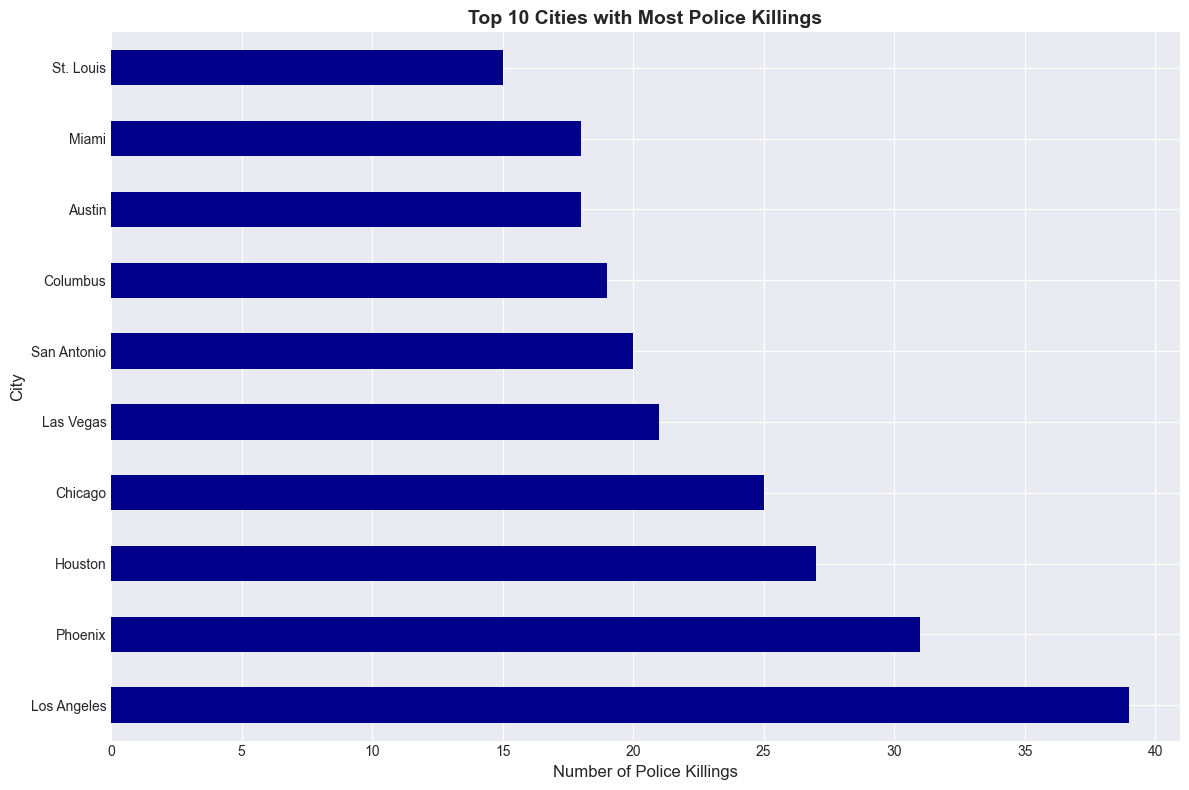

In [35]:
plt.figure(figsize=(12, 8))
top_10_cities.plot(kind='barh', color='darkblue')
plt.xlabel('Number of Police Killings', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Top 10 Cities with Most Police Killings', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Rate of Death by Race

In [36]:
# Get top 10 cities
top_cities = top_10_cities.index.tolist()

# Filter fatalities for top cities
top_cities_fatalities = df_fatalities[df_fatalities['city'].isin(top_cities)]

# Count deaths by race in each city
deaths_by_race_city = top_cities_fatalities.groupby(['city', 'race']).size().reset_index(name='deaths')

print('Deaths by race in top 10 cities:')
print(deaths_by_race_city)

# You would need population data by race for each city to calculate the actual rate

Deaths by race in top 10 cities:
           city race  deaths
0        Austin    B       3
1        Austin    H       2
2        Austin    W      13
3       Chicago    B      21
4       Chicago    H       1
5       Chicago    W       2
6      Columbus    B      11
7      Columbus    O       1
8      Columbus    W       6
9       Houston    A       1
10      Houston    B      15
11      Houston    H       6
12      Houston    N       1
13      Houston    W       3
14    Las Vegas    B       3
15    Las Vegas    H       5
16    Las Vegas    W       9
17  Los Angeles    A       1
18  Los Angeles    B      10
19  Los Angeles    H      19
20  Los Angeles    W       6
21        Miami    B       8
22        Miami    H       6
23        Miami    W       3
24      Phoenix    B       2
25      Phoenix    H      11
26      Phoenix    N       3
27      Phoenix    W      12
28  San Antonio    B       3
29  San Antonio    H      12
30  San Antonio    W       3
31    St. Louis    B      11
32    St. 

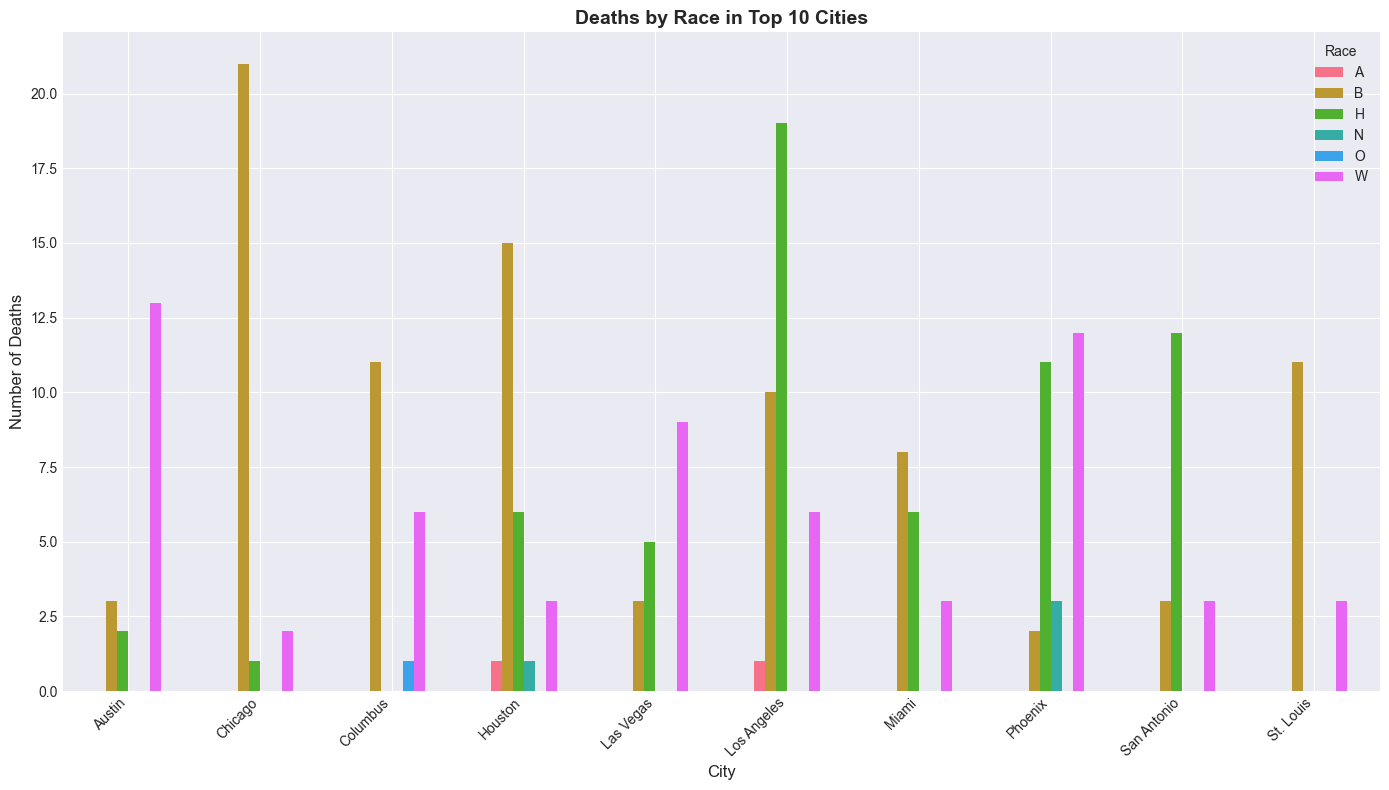

In [37]:
# Visualize deaths by race for each top city
pivot_data = deaths_by_race_city.pivot(index='city', columns='race', values='deaths').fillna(0)
pivot_data.plot(kind='bar', figsize=(14, 8), stacked=False)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.title('Deaths by Race in Top 10 Cities', fontsize=14, fontweight='bold')
plt.legend(title='Race')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a Choropleth Map of Police Killings by US State

In [38]:
deaths_by_state = df_fatalities['state'].value_counts().reset_index()
deaths_by_state.columns = ['state', 'killings']

print('Top 10 states with most killings:')
print(deaths_by_state.head(10))

Top 10 states with most killings:
  state  killings
0    CA       424
1    TX       225
2    FL       154
3    AZ       118
4    OH        79
5    OK        78
6    CO        74
7    GA        70
8    NC        69
9    MO        64


In [39]:
# Create choropleth map using plotly
fig = px.choropleth(deaths_by_state,
                    locations='state',
                    locationmode='USA-states',
                    color='killings',
                    scope='usa',
                    color_continuous_scale='Reds',
                    labels={'killings': 'Number of Killings'},
                    title='Police Killings by US State')
fig.show()

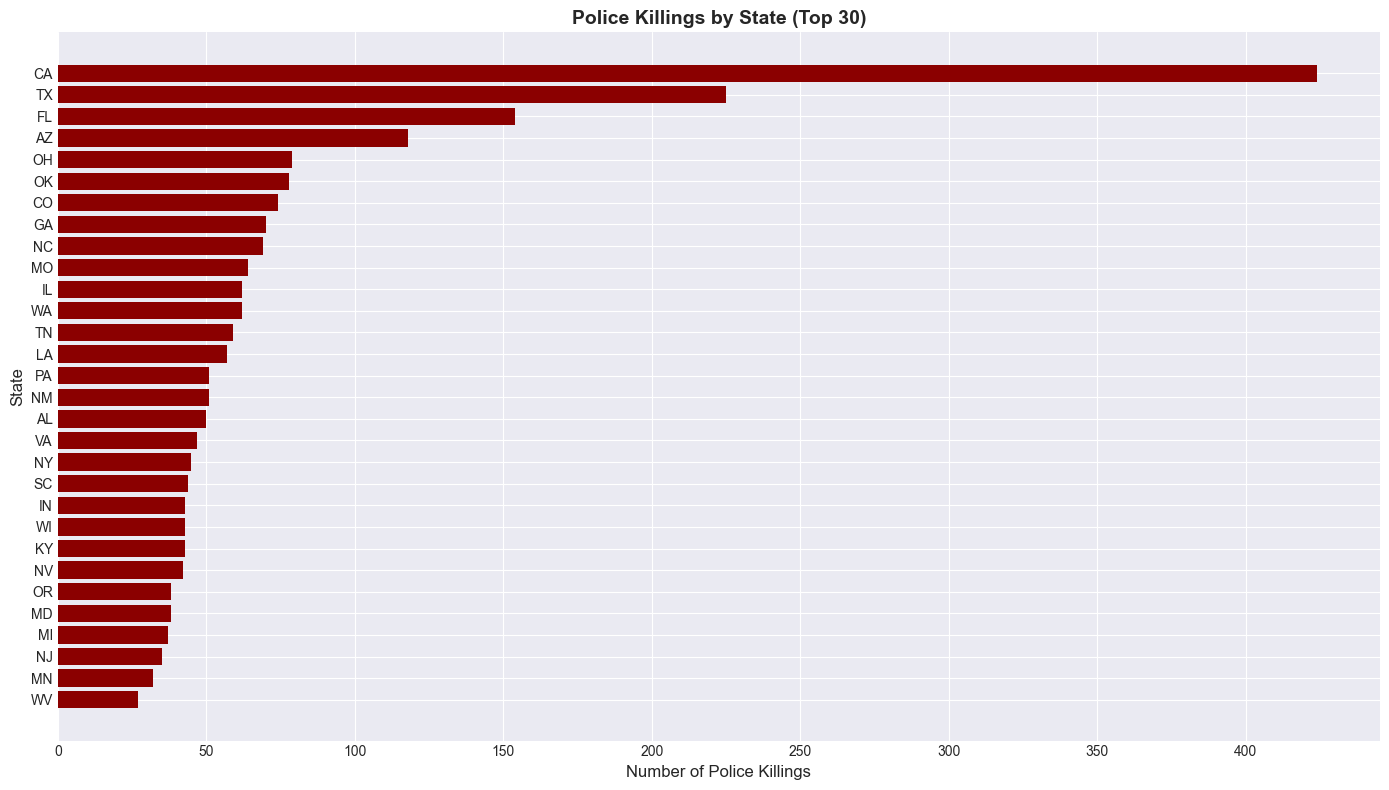

In [40]:
# Static bar chart version
deaths_by_state_sorted = deaths_by_state.sort_values('killings', ascending=True).tail(30)
plt.figure(figsize=(14, 8))
plt.barh(deaths_by_state_sorted['state'], deaths_by_state_sorted['killings'], color='darkred')
plt.xlabel('Number of Police Killings', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Police Killings by State (Top 30)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Number of Police Killings Over Time

In [41]:
# Convert date column to datetime
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

# Extract year and month
df_fatalities['year'] = df_fatalities['date'].dt.year
df_fatalities['month'] = df_fatalities['date'].dt.to_period('M')

# Killings by year
killings_by_year = df_fatalities['year'].value_counts().sort_index()
print('Killings by year:')
print(killings_by_year)

Killings by year:
year
2015    991
2016    963
2017    581
Name: count, dtype: int64


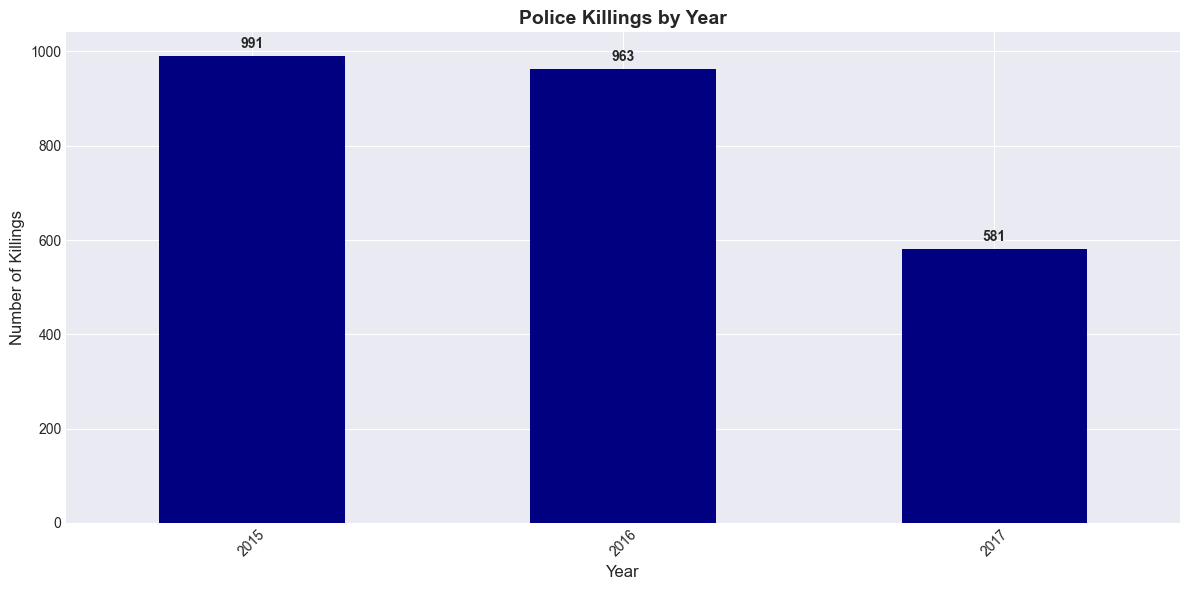

In [42]:
plt.figure(figsize=(12, 6))
killings_by_year.plot(kind='bar', color='navy')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Killings', fontsize=12)
plt.title('Police Killings by Year', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
for i, v in enumerate(killings_by_year.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

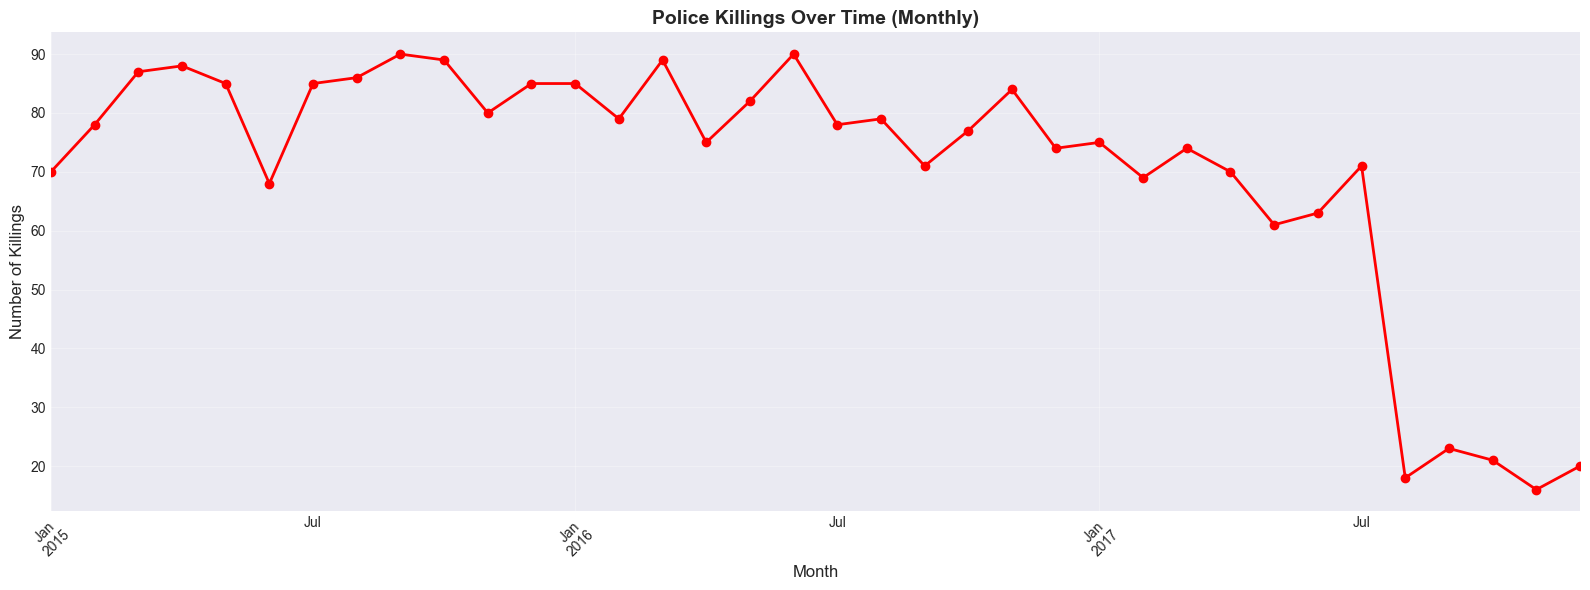

In [43]:
# Monthly time series
killings_by_month = df_fatalities['month'].value_counts().sort_index()

plt.figure(figsize=(16, 6))
killings_by_month.plot(kind='line', color='red', linewidth=2, marker='o')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Killings', fontsize=12)
plt.title('Police Killings Over Time (Monthly)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

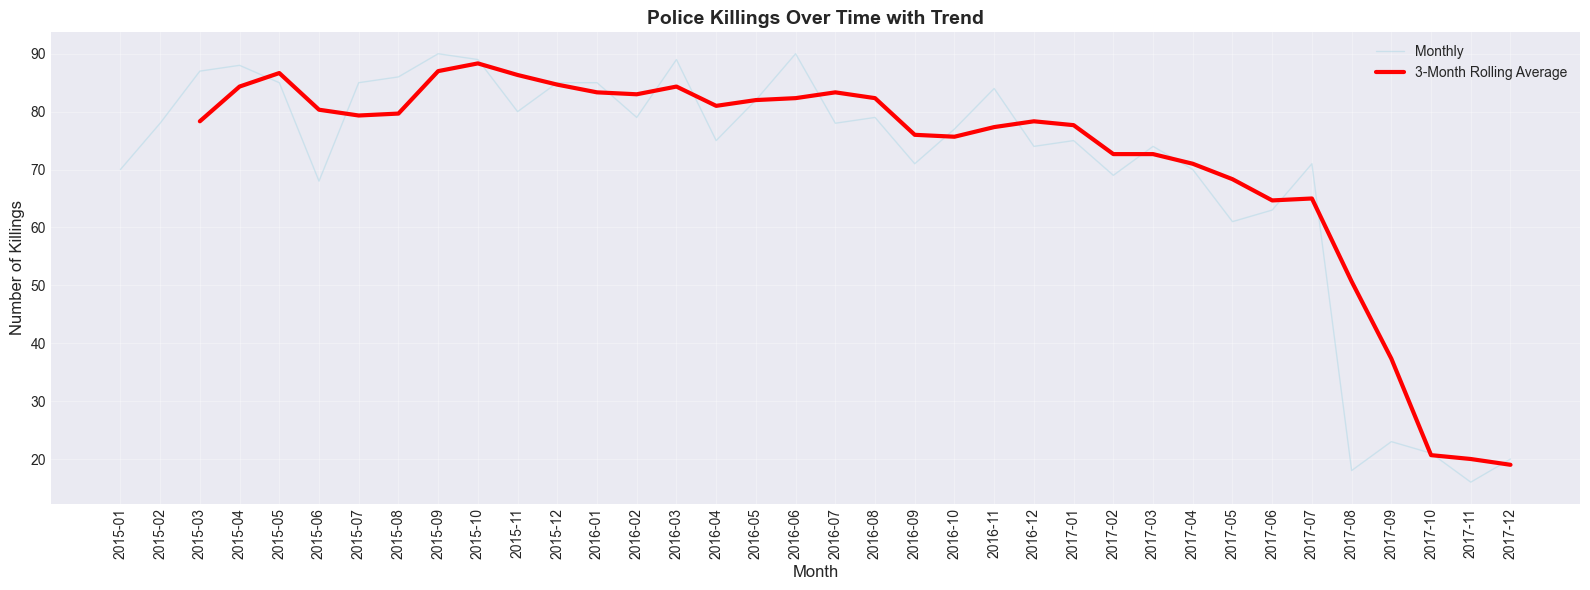

In [44]:
# Calculate rolling average
rolling_avg = killings_by_month.rolling(window=3).mean()

plt.figure(figsize=(16, 6))
plt.plot(killings_by_month.index.astype(str), killings_by_month.values, 
         color='lightblue', linewidth=1, alpha=0.5, label='Monthly')
plt.plot(rolling_avg.index.astype(str), rolling_avg.values, 
         color='red', linewidth=3, label='3-Month Rolling Average')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Killings', fontsize=12)
plt.title('Police Killings Over Time with Trend', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [45]:
# Overall trend analysis
print(f'Total killings from {df_fatalities["date"].min()} to {df_fatalities["date"].max()}')
print(f'Average per year: {len(df_fatalities) / df_fatalities["year"].nunique():.0f}')
print(f'Average per month: {len(df_fatalities) / df_fatalities["month"].nunique():.0f}')

Total killings from 2015-01-03 00:00:00 to 2017-12-07 00:00:00
Average per year: 845
Average per month: 70


# Summary and Key Findings

## Key Insights:

1. **Poverty and Education**: Strong negative correlation (-0.806) between poverty rates and high school graduation rates
2. **Demographics**: Most victims are male (95.8%), with a mean age of 36.6 years
3. **Armed Status**: 55.1% were armed with guns, but 6.7% were unarmed
4. **Mental Health**: About 25% showed signs of mental illness
5. **Geographic Distribution**: California, Texas, and Florida have the highest absolute numbers
6. **Racial Disparities**: When adjusted for population, significant disparities exist across racial groups
7. **Temporal Trends**: Numbers remained relatively stable year-over-year

# Epilogue

For more context and The Washington Post's own analysis, visit:
https://www.washingtonpost.com/graphics/investigations/police-shootings-database/